# Matrix Analysis 2023 - EE312
[LTS2](https://lts2.epfl.ch)
## Systems identification
Basic problem: you observe the input $u(t)$ and the corresponding output $y(t)$ of an unknown linear system $H$. 
Our goal is to identify a goodmodel for the system’s action: $y(t) = H u(t)$, where $H$ is linear.

$y(t) = h_0u(t) + h_1u(t − 1) + ... + h_nu(t − n)$, where $h_0,..., h_n\in\mathbb{R}$.

Rewriting this as a matrix operation:

$\begin{pmatrix}y(n)\\y(n+1)\\ \vdots\\y(n+m)\end{pmatrix} = 
\begin{pmatrix}
u(n) & u(n-1) & ... & u(0)\\
u(n+1) & u(n) & ... & u(1)\\
\vdots&\vdots & & \vdots\\
u(n+m) & u(n+m-1) & ... & u(m)\end{pmatrix}\begin{pmatrix}h_0\\h_1\\ \vdots \\ h_n\end{pmatrix}$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Simple window, will act as a low-pass filter
h=np.array([1, 2, 2, 1])/6.

In [3]:
N = 100
u = np.zeros(N)
u[10:20] = 1.
un = u + 5e-2*np.random.rand(N)

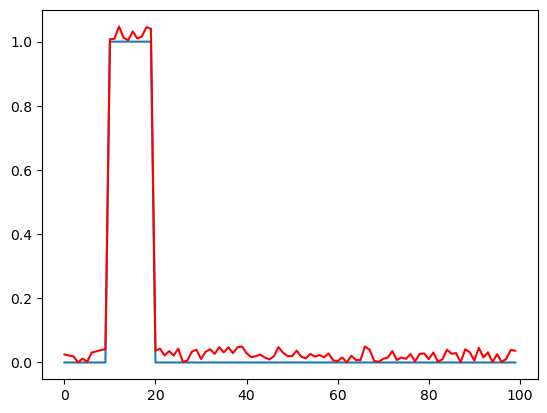

In [4]:
plt.plot(u) # ideal signal
plt.plot(un, 'r') # noisy measurement

In [5]:
def getU(N, M, U):
    Um = np.zeros((N-M, M))
    for k in range(N-M):
        Um[k, :] = U[np.arange(k+M, k, -1)]
    return Um

In [6]:
Um = getU(N, 4, un)

In [7]:
y = Um@h
yn = y + 5e-2*np.random.rand(N-4) 

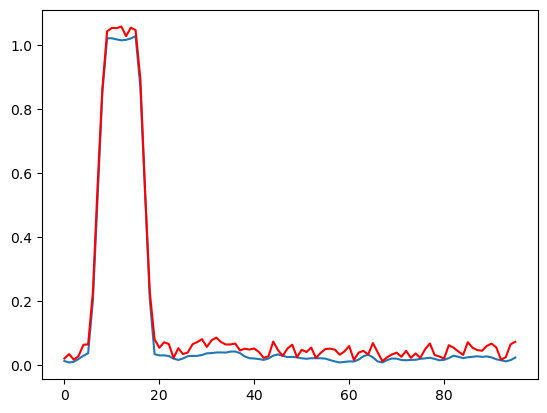

In [8]:
plt.plot(y)
plt.plot(yn, 'r')

In [9]:
h_rec = np.linalg.pinv(getU(N, 4, un))@yn[:N-4]
print(h_rec*6) 

[1.11379236 2.1080738  1.83566857 1.15179166]


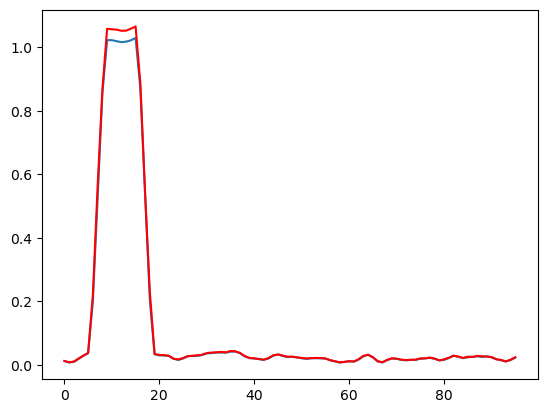

In [10]:
y_rec = Um@h_rec
plt.plot(y)
plt.plot(y_rec, 'r')

In [11]:
h_rec5 = np.linalg.pinv(getU(N, 5, un))@yn[:N-5]
print(h_rec5*6) 

[0.12149628 0.99962524 2.10099667 1.8430933  1.15656753]


In [12]:
h_rec6 = np.linalg.pinv(getU(N, 6, un))@yn[:N-6]
print(h_rec6*6) 

[ 0.13551048 -0.00561836  0.99258459  2.10876744  1.841273    1.16402796]


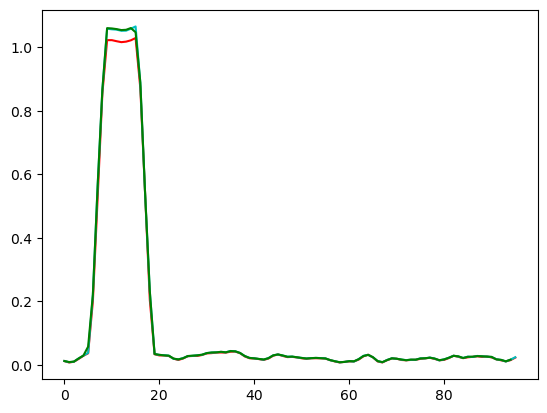

In [13]:
plt.plot(y, 'r')
plt.plot(y_rec, 'c')
plt.plot(getU(N, 5, un)@h_rec5, 'g-')